In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [4]:
import csv
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The data for this exercise is available at: https://www.kaggle.com/datamunge/sign-language-mnist/home

Sign up and download to find 2 CSV files: sign_mnist_test.csv and sign_mnist_train.csv -- You will upload both of them using this button before you can continue.


# 1. Get Data and output arrays for labels and images

In [2]:
def get_data(filename):
  images=[]
  labels=[]
  with open(filename) as files:
    csvfile = csv.reader(files, delimiter=',')
    for row in csvfile:
      label, image = np.split(row, [1])
      
      if label == 'label': # first rows are column headers
        continue
      
      # must be an array and values should be not 'str' but int
      label = np.array(label).astype(int)
      image = np.array(image).astype(int)

      image = np.reshape(image, (28,28)) 
      
      labels.append(label)
      images.append(image)
  
  # should return two arrays
  labels = np.array(labels).ravel() # ravel - to return contiguous flattened array (27455,) and not (27455, 1)
  images = np.array(images)
  return images, labels

training_images, training_labels = get_data('/content/drive/MyDrive/study/tf-specialization/course2_convnets/sign_mnist_train.csv')
testing_images, testing_labels = get_data('/content/drive/MyDrive/study/tf-specialization/course2_convnets/sign_mnist_test.csv')

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


# 2. Preprocessing

In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images, axis=3)
testing_images = np.expand_dims(testing_images, axis=3)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_generator = train_datagen.flow(
    training_images,
    training_labels,
    batch_size = 289
)


validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
    batch_size = 163
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


# 3. Model

In [13]:
# how many classes?

lab = training_labels.tolist() # convert each array to one list
list(set(lab)) # there's NO #9??????

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [16]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([  
    keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation="relu"),
    keras.layers.MaxPool2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(len(set(training_labels.tolist())) + 1, activation="softmax")    
])
# len(set(training_labels.tolist())) + 1 = 25 classes
# len(set(training_labels.tolist())) this returns 24 but the classes are 0-24 without 9
# so the range of the classes is still 25 since it's range is from 0 to 24

# Compile Model. 
model.compile( loss = "sparse_categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

# Train the Model
history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch = len(training_labels)/289,
    validation_data = validation_generator,
    validation_steps = len(testing_labels)/163
)

model.evaluate(testing_images, testing_labels)
    
# The output from model.evaluate should be close to:
#[6.92426086682151, 0.56609035]


Epoch 1/10
95/95 [==============================] - 29s 303ms/step - loss: 3.0188 - accuracy: 0.1026 - val_loss: 2.5856 - val_accuracy: 0.2520
Epoch 2/10
95/95 [==============================] - 29s 303ms/step - loss: 2.7137 - accuracy: 0.1901 - val_loss: 2.0859 - val_accuracy: 0.3974
Epoch 3/10
95/95 [==============================] - 29s 304ms/step - loss: 2.4679 - accuracy: 0.2541 - val_loss: 1.9656 - val_accuracy: 0.3967
Epoch 4/10
95/95 [==============================] - 29s 304ms/step - loss: 2.2514 - accuracy: 0.3133 - val_loss: 1.5149 - val_accuracy: 0.5675
Epoch 5/10
95/95 [==============================] - 29s 304ms/step - loss: 2.0688 - accuracy: 0.3661 - val_loss: 1.8162 - val_accuracy: 0.3862
Epoch 6/10
95/95 [==============================] - 29s 303ms/step - loss: 1.8942 - accuracy: 0.4134 - val_loss: 1.5300 - val_accuracy: 0.4820
Epoch 7/10
95/95 [==============================] - 29s 303ms/step - loss: 1.7339 - accuracy: 0.4553 - val_loss: 1.3353 - val_accuracy: 0.5562

[163.27542114257812, 0.508644700050354]

# 4. Plot Loss and Accuracy

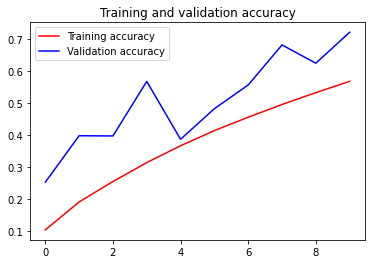

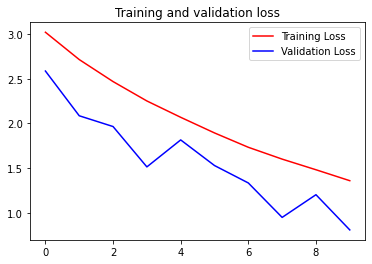

In [17]:
# Plot the chart for accuracy and loss on both training and validation

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()